In [42]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import zip_longest
import os
import glob
import ast

In [43]:
df = pd.read_csv("all_measurements_summary.csv")

In [44]:
df.keys()

Index(['zero_offset', 'expected_weight', 'value', 'force_vector.Mx',
       'force_vector.My', 'force_vector.Fz', 'robot_tcp.velocity_linear.Vx',
       'robot_tcp.velocity_linear.Vy', 'robot_tcp.velocity_linear.Vz',
       'robot_tcp.velocity_angular.Wx', 'robot_tcp.velocity_angular.Wy',
       'robot_tcp.velocity_angular.Wz', 'robot_tcp.joint_angles.base',
       'robot_tcp.joint_angles.shoulder', 'robot_tcp.joint_angles.elbow',
       'robot_tcp.joint_angles.wrist_1', 'robot_tcp.joint_angles.wrist_2',
       'robot_tcp.joint_angles.wrist_3', 'robot_tcp.flange.tx',
       'robot_tcp.flange.ty', 'robot_tcp.flange.tz', 'robot_tcp.flange.qw',
       'robot_tcp.flange.qx', 'robot_tcp.flange.qy', 'robot_tcp.flange.qz'],
      dtype='object')

In [45]:
df

,zero_offset,expected_weight,value,force_vector.Mx,force_vector.My,force_vector.Fz,robot_tcp.velocity_linear.Vx,robot_tcp.velocity_linear.Vy,robot_tcp.velocity_linear.Vz,robot_tcp.velocity_angular.Wx,...,robot_tcp.joint_angles.wrist_1,robot_tcp.joint_angles.wrist_2,robot_tcp.joint_angles.wrist_3,robot_tcp.flange.tx,robot_tcp.flange.ty,robot_tcp.flange.tz,robot_tcp.flange.qw,robot_tcp.flange.qx,robot_tcp.flange.qy,robot_tcp.flange.qz
0,-0.111534,0.105,-0.033508,0.546469,-0.010249,13.246939,0.668388,0.167522,1.021495,-0.043196,...,-2.190106,4.691436,-1.922700,-0.532655,-0.744487,0.229433,-0.530563,0.847511,0.013933,0.004224
1,-0.106988,0.318,0.217663,0.009266,0.335527,17.527383,0.235539,0.005424,0.992567,0.013035,...,-2.539432,4.707798,-3.600763,-0.293113,-0.559246,0.205482,0.988812,-0.148761,-0.009088,0.005305
2,-0.113433,0.154,0.026283,0.394746,-0.024002,15.817073,0.217583,-0.071595,0.969784,-0.111448,...,-2.405048,4.692700,-1.831010,-0.267612,-0.529407,0.234284,-0.510403,0.859409,0.017731,0.020974
3,-0.115961,0.254,0.147429,0.533012,-0.216642,15.896761,0.580538,0.005208,0.984429,0.014846,...,-2.305532,4.729643,-1.224130,-0.423766,-0.540051,0.275155,-0.151717,0.988389,-0.002819,0.007212
4,-0.014848,0.165,0.140266,0.282091,0.167895,15.269777,0.586947,0.152390,0.936964,0.052247,...,-2.140639,4.731679,-3.316016,-0.308994,-0.667908,0.354600,0.969513,-0.244890,0.006659,-0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,-0.102833,NaN,-0.030148,0.000188,-0.064662,15.621457,-0.000051,-0.000038,0.000055,-0.000060,...,-1.559613,4.719714,-3.375033,-0.125538,-0.445232,0.622676,0.977339,-0.211682,0.000005,-0.000011
16793,-0.182765,NaN,0.159089,0.141335,0.019957,19.060852,0.103010,-0.167188,0.756467,0.036465,...,-2.704978,4.734760,-1.451666,-0.331521,-0.380680,0.140933,-0.186595,0.982121,-0.002324,0.023749
16794,-0.138998,NaN,-0.053713,-0.128587,0.222658,14.226069,0.063267,0.039578,0.961461,-0.036422,...,-2.403008,4.688512,-3.654032,-0.205225,-0.535427,0.264792,0.997035,-0.075448,-0.009256,-0.011476
16795,-0.160860,NaN,0.157037,-0.180785,0.199280,17.738337,0.120499,-0.091941,0.922738,-0.048454,...,-2.658055,4.701482,-4.199409,-0.269701,-0.505755,0.163638,0.991255,0.131698,-0.004597,-0.005054


In [46]:
df = df.drop([
    "robot_tcp.tcp_offset.tx","robot_tcp.tcp_offset.ty","robot_tcp.tcp_offset.tz",
    "robot_tcp.tcp_offset.qw","robot_tcp.tcp_offset.qx","robot_tcp.tcp_offset.qy","robot_tcp.tcp_offset.qz",
    "force_sensor_offset.tx","force_sensor_offset.ty","force_sensor_offset.tz",
    "force_sensor_offset.qw","force_sensor_offset.qx","force_sensor_offset.qy","force_sensor_offset.qz",
    "_source_file", "timestamp"
], axis=1, errors="ignore")
df = df.dropna(axis=0, how='any')

In [47]:
df.to_csv("all_measurements_summary.csv", index=False)

In [48]:
X = df.drop(columns=["expected_weight"])
y = df["expected_weight"]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}

In [52]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))

In [53]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "R2"])
print(results_df.sort_values(by="MAE"))

               Model       MAE        R2
0  Linear Regression  0.013025  0.980660
1   Ridge Regression  0.013034  0.980646
4      Random Forest  0.015517  0.973813
3      Decision Tree  0.023276  0.942853
2   Lasso Regression  0.023337  0.960056


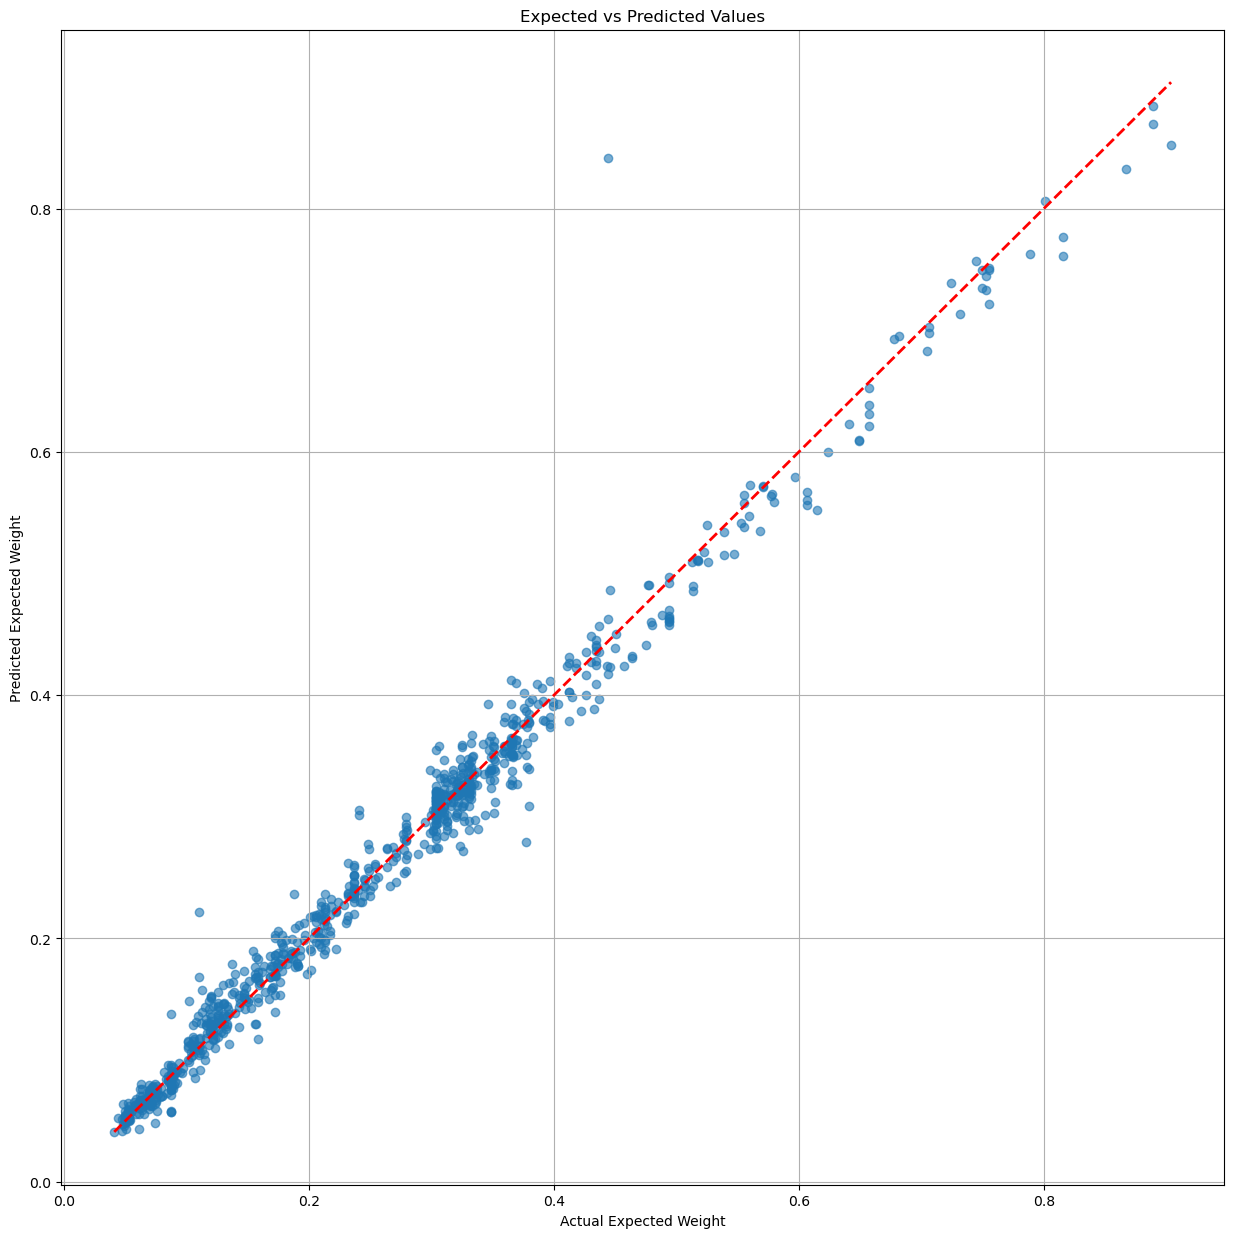

In [57]:
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Expected Weight")
plt.ylabel("Predicted Expected Weight")
plt.title("Expected vs Predicted Values")
plt.grid(True)
plt.show()

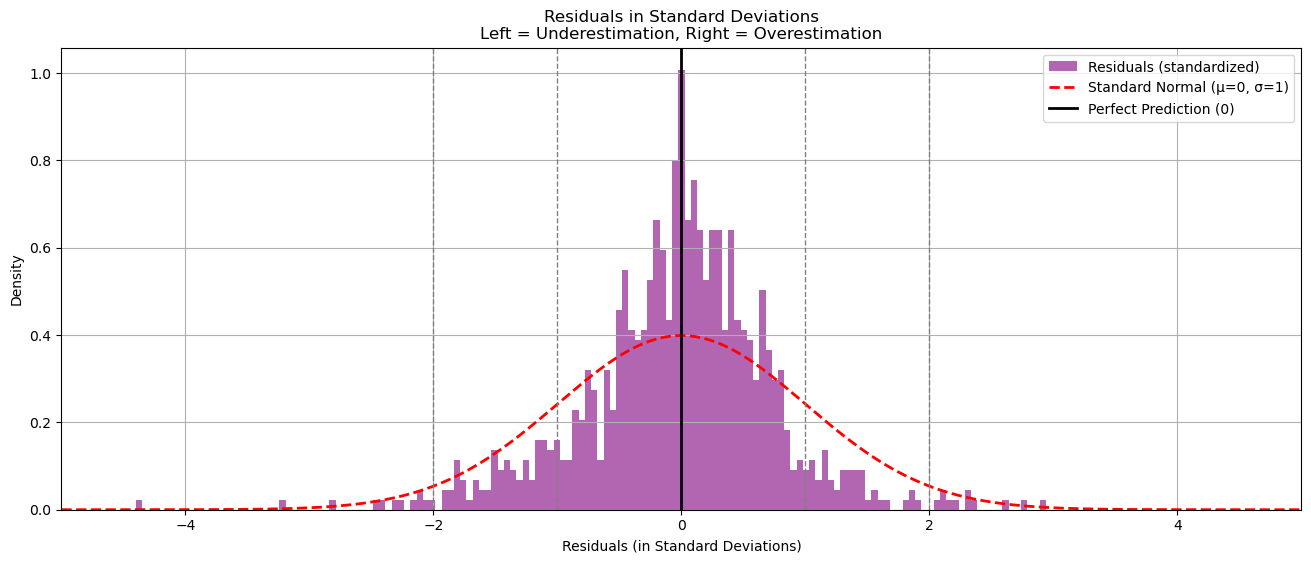

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# residuals: difference between predicted and actual
residuals = y_pred - y_test

plt.figure(figsize=(16,6))

# Fit normal to residuals
mu_res, std_res = norm.fit(residuals)

# Convert residuals to standard deviations (z-scores)
z_residuals = (residuals - mu_res) / std_res

# Create x-axis in standard deviation units
x = np.linspace(-5, 5, 400)
p = norm.pdf(x, 0, 1)  # standard normal curve (mean=0, std=1)

# Histogram of z-scored residuals
plt.hist(z_residuals, bins=np.linspace(-5, 5, 200), density=True,
         alpha=0.6, color='purple', label='Residuals (standardized)')

# Plot standard normal curve
plt.plot(x, p, 'r--', linewidth=2, label='Standard Normal (μ=0, σ=1)')

# Add reference lines
plt.axvline(0, color='black', linestyle='-', linewidth=2, label='Perfect Prediction (0)')
plt.axvline(-1, color='gray', linestyle='--', linewidth=1)
plt.axvline(1, color='gray', linestyle='--', linewidth=1)
plt.axvline(-2, color='gray', linestyle='--', linewidth=1)
plt.axvline(2, color='gray', linestyle='--', linewidth=1)

# Labels and title
plt.title("Residuals in Standard Deviations\nLeft = Underestimation, Right = Overestimation")
plt.xlabel("Residuals (in Standard Deviations)")
plt.ylabel("Density")
plt.xlim(-5, 5)
plt.legend()
plt.grid(True)
plt.show()


In [83]:
import numpy as np
from scipy.stats import norm

# residuals: difference between predicted and actual
residuals = y_pred - y_test

# Fit normal to residuals
mu_res, std_res = norm.fit(residuals)

# Convert residuals to z-scores (standard deviations)
z_residuals = (residuals - mu_res) / std_res

# Define ranges (you can extend beyond ±3 if needed)
ranges = [(0,1), (1,2), (2,3), (3,4), (4,5)]
neg_ranges = [(-1,0), (-2,-1), (-3,-2), (-4,-3), (-5,-4)]

# Helper to count within range
def count_in_range(data, lo, hi):
    return np.sum((data >= lo) & (data < hi))

# Count positives and negatives separately
print("📊 Residual Counts by Standard Deviation Range:")
for (lo, hi) in neg_ranges[::-1]:  # from -5→-4 up to -1→0
    count = count_in_range(z_residuals, lo, hi)
    perc = count / len(z_residuals) * 100
    print(f"Between {lo:.0f}σ and {hi:.0f}σ : {count} ({perc:.2f}%)")

for (lo, hi) in ranges:
    count = count_in_range(z_residuals, lo, hi)
    perc = count / len(z_residuals) * 100
    print(f"Between {lo:.0f}σ and {hi:.0f}σ : {count} ({perc:.2f}%)")

📊 Residual Counts by Standard Deviation Range:
Between -5σ and -4σ : 1 (0.11%)
Between -4σ and -3σ : 1 (0.11%)
Between -3σ and -2σ : 9 (1.03%)
Between -2σ and -1σ : 75 (8.61%)
Between -1σ and 0σ : 337 (38.69%)
Between 0σ and 1σ : 387 (44.43%)
Between 1σ and 2σ : 48 (5.51%)
Between 2σ and 3σ : 11 (1.26%)
Between 3σ and 4σ : 0 (0.00%)
Between 4σ and 5σ : 0 (0.00%)
